# Mid-long term forecast

As such, Electricity Price Forecasting (EPF) has become a problem of increasing complexity due to various factors such as the transformation of the energy sector and geopolitical challenges in the power industry. The mid and long term forecast is quite a challenging but also beneficial for the stakeholders problem. However, the complexity along with the variation of the indicators used in short term forecast, are bottleneckfor an accurate forecast. In the current mid term approach, the original dataset has been tranformed, in order to capture the monthly trend in terms of load, while the stock market prices, have been shifted weekly. Actually, the whole input x, at time t targets to y, at time t+168, which is a weekly period. 
The different algorithms have been trained and evaluated with the same method as short term forecasters.

For the long term forecast, two algorithms have been deployed, ARIMA with various variants and Ridge autoregressor, with and without exogenous factors included. The way that these models are tested is altered compared to the previous approaches. In more details, we followed a walk-forward validation. Initially, following the method 1 or 2, used before the dataset is splitted. Next, reccursively test using the training dataset, which updates at each next time step. At each step t, after the training step, the last actual test point, is included in the training dataset. This allows the simulation of how the model would perform in a real-world scenario where new data is continuously becoming available. 
Additionally, they were trained including exogenous factors, such as the loads and the stock prices from the original dataset. However, due to their computational expense they weren't evaluated for the whole dataset, but their performance over a specific period of time: step, is plotted. Especially, ARIMA with exogenous factors required almost 2 minutes for only one training step-1 hour.

Additionally, it is noteworthy that ARIMA was tested in an hourly dataset, which means that for each hour of the day, a different ARIMA model was trained.





In [39]:
%%capture
%load_ext autoreload
%autoreload all
from helper_mid import *
from time_analysis import *
%autoreload
%aimport helper_mid

from __init__ import root_dir, data_path

In [37]:
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
            'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
             'ttf_price', 'coal_price', 'co2_price',
            'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22367
Model:                 ARIMA(8, 0, 1)   Log Likelihood              -66988.010
Date:                Tue, 25 Apr 2023   AIC                         133998.019
Time:                        13:37:17   BIC                         134086.188
Sample:                             0   HQIC                        134026.710
                              - 22367                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5788      1.533     25.168      0.000      35.574      41.583
ar.L1          2.1742 

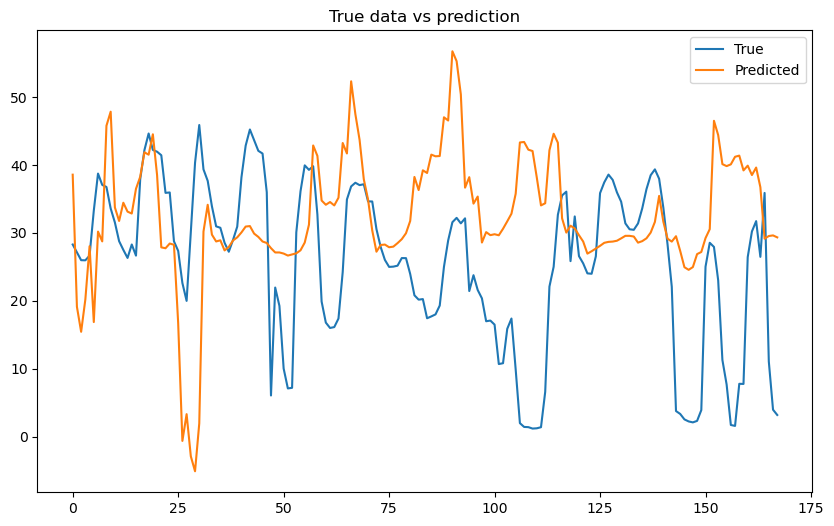

Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30599
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -100062.793
Date:                Tue, 25 Apr 2023   AIC                         200147.587
Time:                        13:37:55   BIC                         200239.203
Sample:                             0   HQIC                        200176.955
                              - 30599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4794      1.623     24.939      0.000      37.298      43.661
ar.L1          2.1299 

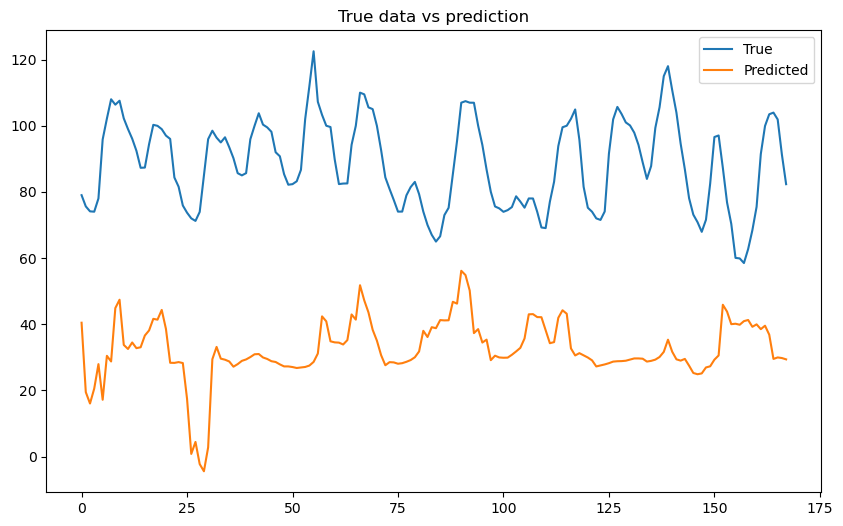

Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                44086
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -187336.512
Date:                Tue, 25 Apr 2023   AIC                         374695.025
Time:                        13:38:44   BIC                         374790.657
Sample:                             0   HQIC                        374725.157
                              - 44086                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5359     11.214      7.360      0.000      60.557     104.515
ar.L1          1.7049 

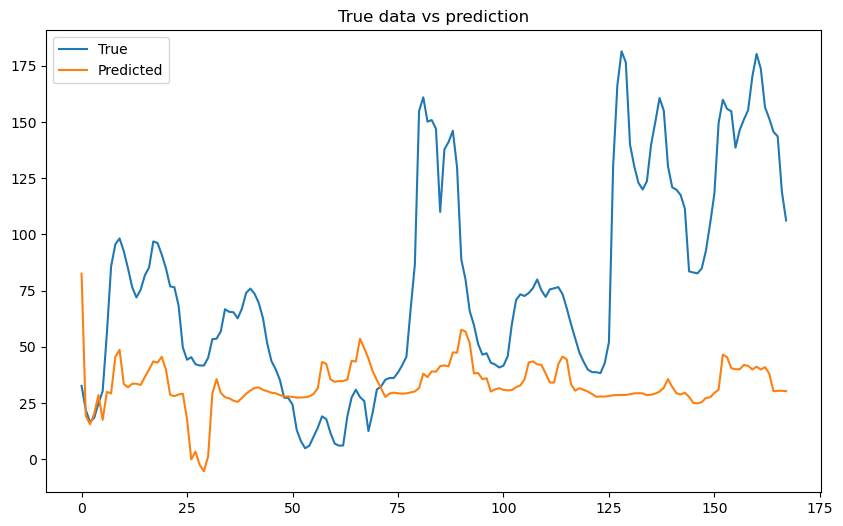

([array([38.57882573, 19.13251637, 15.4493654 , 20.21742255, 28.04296592,
         16.88077238, 30.19927236, 28.75495781, 45.7835438 , 47.84693686,
         33.75199466, 31.7630623 , 34.44811752, 33.13607793, 32.85721441,
         36.49886538, 38.26543564, 41.87066389, 41.52309838, 44.52094914,
         38.51509534, 27.88043858, 27.74645054, 28.44126562, 28.26197607,
         16.73225438, -0.61666657,  3.3216548 , -2.88542625, -5.08776855,
          1.96718477, 30.20005677, 34.14549725, 29.74855654, 28.74735567,
         28.91639485, 27.42580557, 27.93563374, 28.89238028, 29.35108871,
         30.07636226, 30.94082875, 31.01100755, 29.90331244, 29.41712537,
         28.73961612, 28.52300876, 27.75908691, 27.12634085, 27.12765418,
         26.96473496, 26.67010585, 26.83302481, 26.99936962, 27.44493077,
         28.58480363, 31.21739829, 42.87911455, 41.34568709, 34.77653182,
         34.15004053, 34.55066179, 34.04993073, 35.18664763, 43.24187605,
         41.7002443 , 52.32213136, 47.

In [41]:
run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168)

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22367
Model:                 ARIMA(8, 0, 1)   Log Likelihood              -66988.010
Date:                Tue, 25 Apr 2023   AIC                         133998.019
Time:                        13:25:58   BIC                         134086.188
Sample:                             0   HQIC                        134026.710
                              - 22367                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5788      1.533     25.168      0.000      35.574      41.583
ar.L1          2.1742 

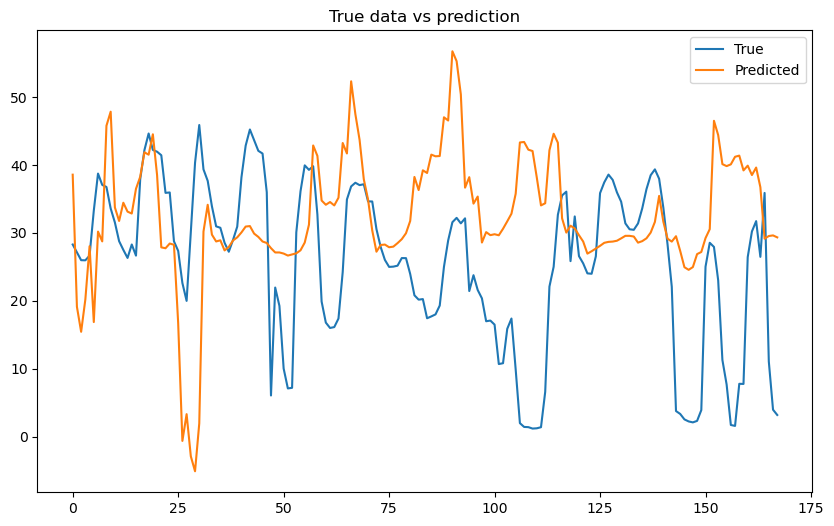

Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30599
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -100062.793
Date:                Tue, 25 Apr 2023   AIC                         200147.587
Time:                        13:26:36   BIC                         200239.203
Sample:                             0   HQIC                        200176.955
                              - 30599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4794      1.623     24.939      0.000      37.298      43.661
ar.L1          2.1299 

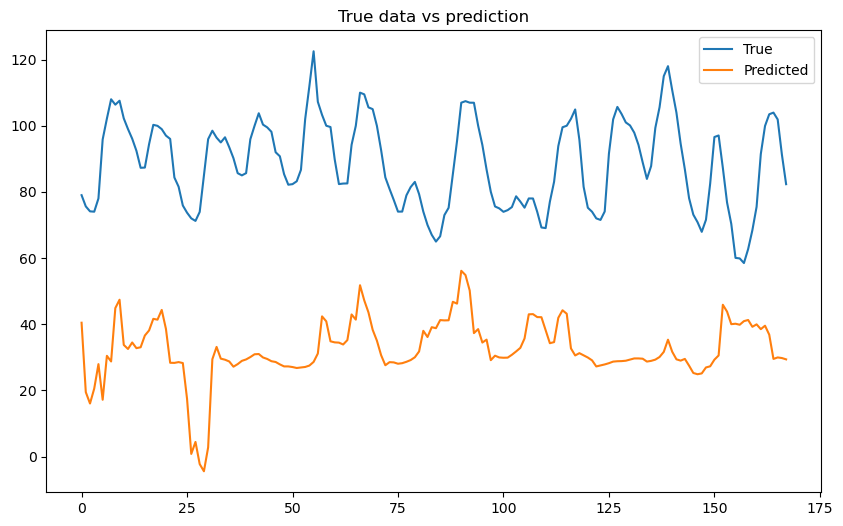

Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                44086
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -187336.512
Date:                Tue, 25 Apr 2023   AIC                         374695.025
Time:                        13:27:25   BIC                         374790.657
Sample:                             0   HQIC                        374725.157
                              - 44086                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5359     11.214      7.360      0.000      60.557     104.515
ar.L1          1.7049 

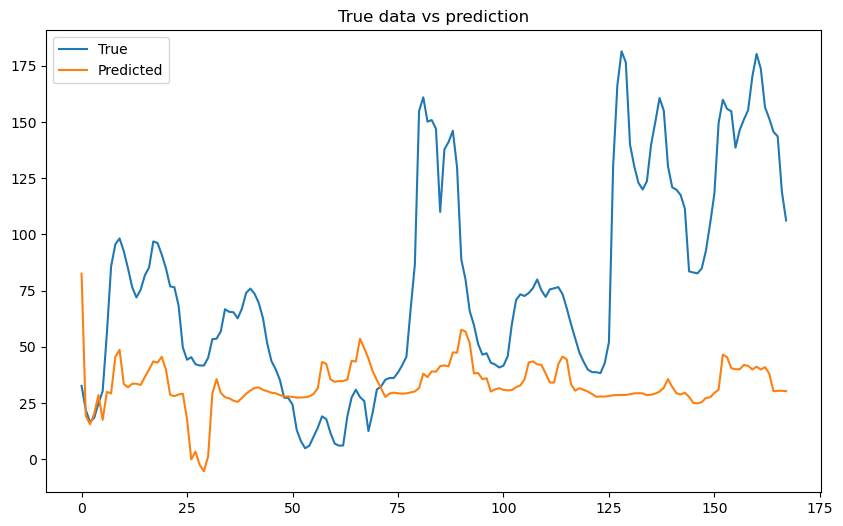

([array([38.57882573, 19.13251637, 15.4493654 , 20.21742255, 28.04296592,
         16.88077238, 30.19927236, 28.75495781, 45.7835438 , 47.84693686,
         33.75199466, 31.7630623 , 34.44811752, 33.13607793, 32.85721441,
         36.49886538, 38.26543564, 41.87066389, 41.52309838, 44.52094914,
         38.51509534, 27.88043858, 27.74645054, 28.44126562, 28.26197607,
         16.73225438, -0.61666657,  3.3216548 , -2.88542625, -5.08776855,
          1.96718477, 30.20005677, 34.14549725, 29.74855654, 28.74735567,
         28.91639485, 27.42580557, 27.93563374, 28.89238028, 29.35108871,
         30.07636226, 30.94082875, 31.01100755, 29.90331244, 29.41712537,
         28.73961612, 28.52300876, 27.75908691, 27.12634085, 27.12765418,
         26.96473496, 26.67010585, 26.83302481, 26.99936962, 27.44493077,
         28.58480363, 31.21739829, 42.87911455, 41.34568709, 34.77653182,
         34.15004053, 34.55066179, 34.04993073, 35.18664763, 43.24187605,
         41.7002443 , 52.32213136, 47.

In [40]:
run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168,exog=None)


In [5]:
import os

In [6]:
%%capture
df_clean = pd.read_csv(os.path.join(data_path,'clean.csv'), parse_dates=['Timestamp'])
datam=load_data(df_clean)
data_m=split(datam)

In [ ]:
data_m=data_m[144:-284]
data_m.isna().sum()

Timestamp                 0
Day_Ahead_price           0
ttf_price                 0
coal_price                0
co2_price                 0
Hour                      0
Date                      0
Weekday                   0
business                  0
DK_1_imports_mean4        0
SE_4_imports_mean4        0
DK_1_exports_mean4        0
SE_4_exports_mean4        0
Actual_Load_mean4         0
Solar_[MW]_mean4          0
DE_LU_AT_imports_mean4    0
DE_LU_AT_exports_mean4    0
Wind Total_mean4          0
dtype: int64

In [ ]:
data_m[data_m['Day_Ahead_price'].isna()==True]

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Date,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4


# Data-transformation for mid term

In [12]:
# setting up features and target
cols_std = ['ttf_price', 'coal_price', 'co2_price','DK_1_imports_mean4',
       'SE_4_imports_mean4', 'DK_1_exports_mean4', 'SE_4_exports_mean4',
       'Actual_Load_mean4', 'Solar_[MW]_mean4', 'DE_LU_AT_imports_mean4',
       'DE_LU_AT_exports_mean4', 'Wind Total_mean4'] 
features = cols_std + ['Weekday', 'Hour']
target = 'Day_Ahead_price'

In [13]:
# setting up splits
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)


df_lagged=data_m.copy()
df_lagged

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Date,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
0,2018-01-02 00:00:00,18.12,19.320000,102.65,8.22,0,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 01:00:00,14.99,19.320000,102.65,8.22,1,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02 02:00:00,17.79,19.320000,102.65,8.22,2,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02 03:00:00,24.51,19.320000,102.65,8.22,3,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02 04:00:00,17.82,19.320000,102.65,8.22,4,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40000,2023-04-29 16:00:00,50.01,41.148998,194.15,79.40,16,2023-04-15,5,False,0.0,967.00,542.00,0.0,1527.33,226.67,0.00,2892.00,912.33
40001,2023-04-29 17:00:00,50.01,41.148998,194.15,79.40,17,2023-04-15,5,False,0.0,1094.67,523.00,0.0,1568.00,107.33,0.00,2827.00,880.33
40002,2023-04-29 18:00:00,50.01,41.148998,194.15,79.40,18,2023-04-15,5,False,0.0,1105.67,460.33,0.0,1548.33,20.33,0.00,2787.00,841.67
40003,2023-04-29 19:00:00,50.01,41.148998,194.15,79.40,19,2023-04-15,5,False,0.0,1159.00,456.67,0.0,1501.67,0.67,0.00,2852.33,806.33


# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [14]:
split_method = 0
df_lagged

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Date,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
0,2018-01-02 00:00:00,18.12,19.320000,102.65,8.22,0,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 01:00:00,14.99,19.320000,102.65,8.22,1,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02 02:00:00,17.79,19.320000,102.65,8.22,2,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02 03:00:00,24.51,19.320000,102.65,8.22,3,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02 04:00:00,17.82,19.320000,102.65,8.22,4,2018-01-02,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40000,2023-04-29 16:00:00,50.01,41.148998,194.15,79.40,16,2023-04-15,5,False,0.0,967.00,542.00,0.0,1527.33,226.67,0.00,2892.00,912.33
40001,2023-04-29 17:00:00,50.01,41.148998,194.15,79.40,17,2023-04-15,5,False,0.0,1094.67,523.00,0.0,1568.00,107.33,0.00,2827.00,880.33
40002,2023-04-29 18:00:00,50.01,41.148998,194.15,79.40,18,2023-04-15,5,False,0.0,1105.67,460.33,0.0,1548.33,20.33,0.00,2787.00,841.67
40003,2023-04-29 19:00:00,50.01,41.148998,194.15,79.40,19,2023-04-15,5,False,0.0,1159.00,456.67,0.0,1501.67,0.67,0.00,2852.33,806.33


### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
                     Day_Ahead_price  ttf_price  coal_price  co2_price  Hour  \
Timestamp                                                                      
2020-07-22 00:00:00            28.30      4.830        52.1      27.53     0   
2020-07-22 01:00:00            27.15      4.830        52.1      27.53     1   
2020-07-22 02:00:00            25.99      4.830        52.1      27.53     2   
2020-07-22 03:00:00            25.97      4.830        52.1      27.53     3   
2020-07-22 04:00:00            26.66      4.830        52.1      27.53     4   
...                              ...        ...         ...        ...   ...   
2020-12-31 19:00:00            59.47     19.125        80.5      32.94    19   
2020-12-31 20:00:00            56.70     19.125        80.5      32.94    20   
2020-12-31 21:00:00            52.44     19.125        80.5      32.94    21   
2020-12-31 

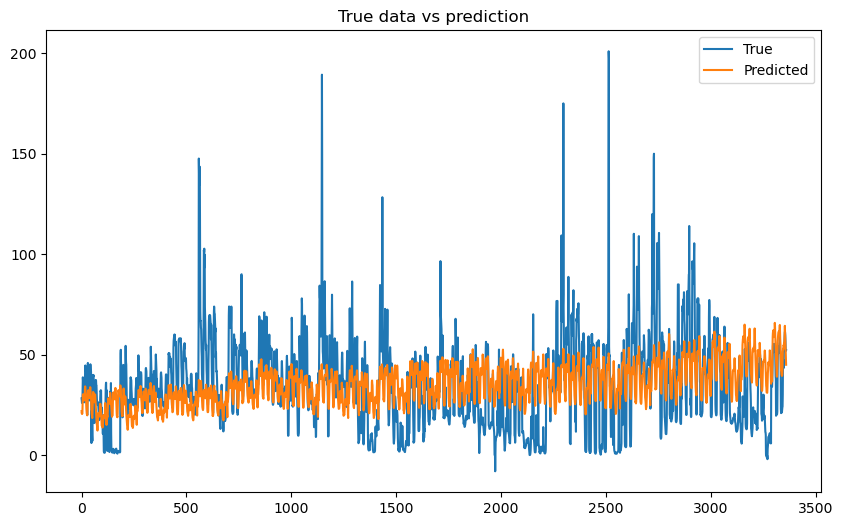

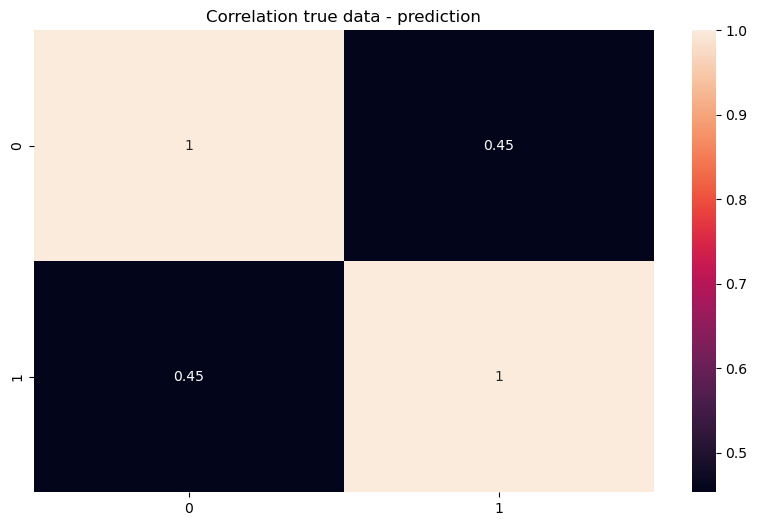

	r^2=0.204786
Mean Absolute Error (MAE): 14.800410381305277
Mean Squared Error (MSE): 382.6830398439949
Root Mean Squared Error (RMSE): 19.56228616097809
Mean Absolute Percentage Error (MAPE): 228.42
Accuracy: -128.42
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
                     Day_Ahead_price  ttf_price  coal_price  co2_price  Hour  \
Timestamp                                                                      
2021-06-30 00:00:00            79.02  34.622002      134.70      56.78     0   
2021-06-30 01:00:00            75.63  34.622002      134.70      56.78     1   
2021-06-30 02:00:00            74.13  34.622002      134.70      56.78     2   
2021-06-30 03:00:00            74.03  34.622002      134.70      56.78     3   
2021-06-30 04:00:00            78.03  34.622002      134.70      56.78     4   
...                              ...        ...         ...        ...   ...   
2021-07-31 19:00:00            69

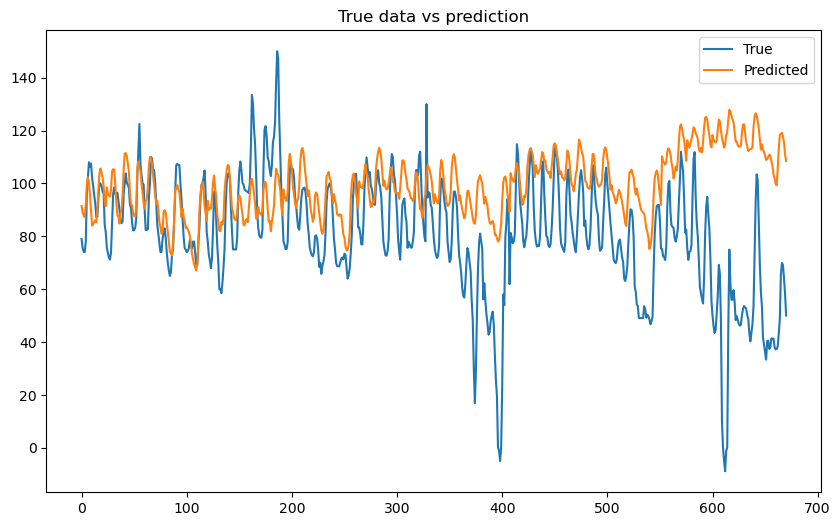

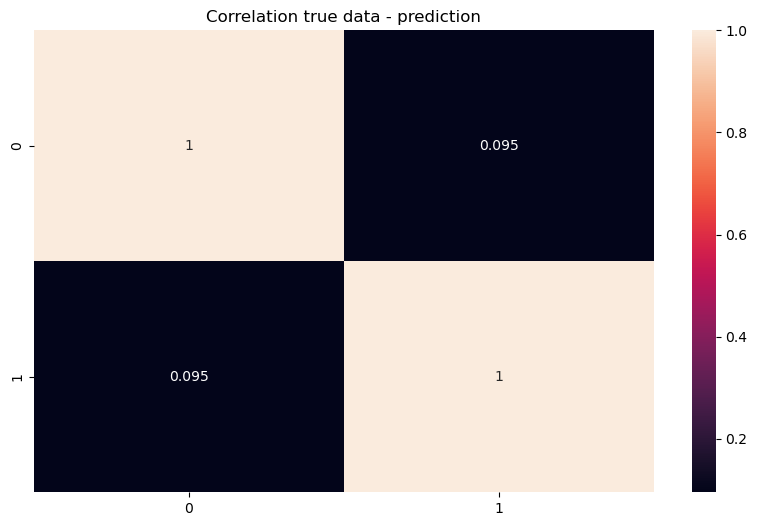

	r^2=-0.903293
Mean Absolute Error (MAE): 22.403308485114444
Mean Squared Error (MSE): 935.3936197901422
Root Mean Squared Error (RMSE): 30.58420539739658
Mean Absolute Percentage Error (MAPE): 1893.37
Accuracy: -1793.37
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
                     Day_Ahead_price  ttf_price  coal_price  co2_price  Hour  \
Timestamp                                                                      
2023-01-13 00:00:00            32.64  64.811996      370.25       79.4     0   
2023-01-13 01:00:00            21.87  64.811996      370.25       79.4     1   
2023-01-13 02:00:00            16.54  64.811996      370.25       79.4     2   
2023-01-13 03:00:00            18.46  64.811996      370.25       79.4     3   
2023-01-13 04:00:00            24.82  64.811996      370.25       79.4     4   
...                              ...        ...         ...        ...   ...   
2023-04-15 19:00:00           

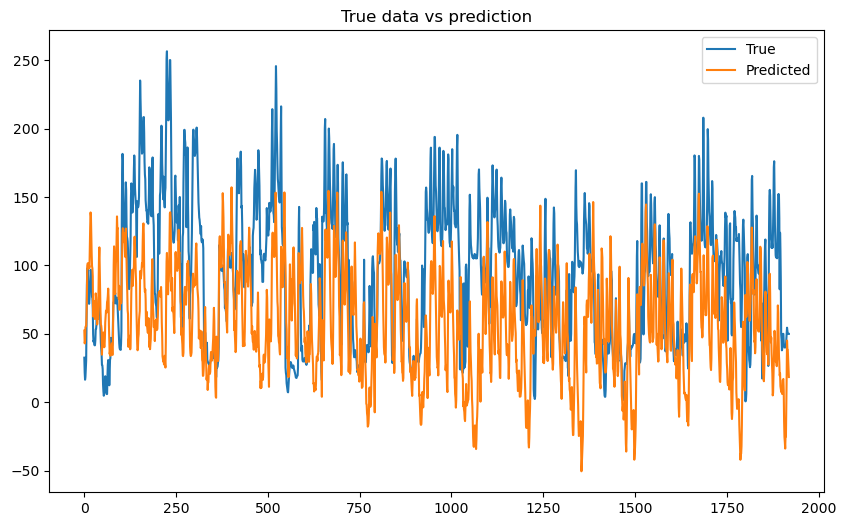

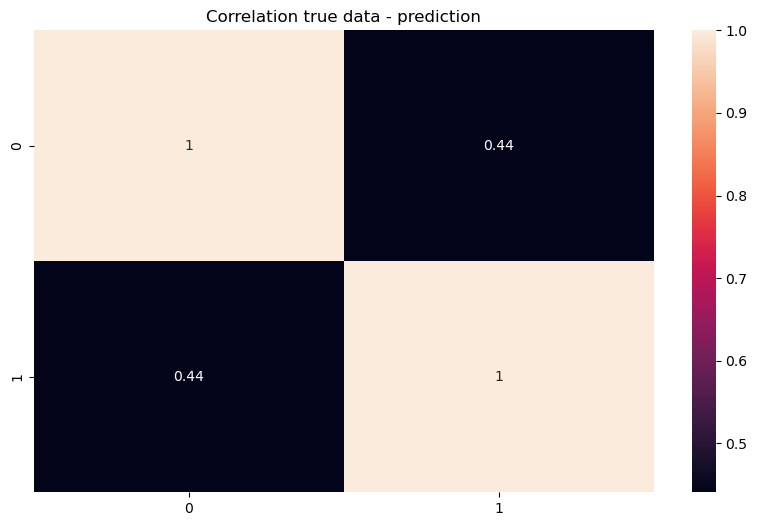

	r^2=-0.509662
Mean Absolute Error (MAE): 49.54584579228025
Mean Squared Error (MSE): 3706.9572901870747
Root Mean Squared Error (RMSE): 60.884787017670305
Mean Absolute Percentage Error (MAPE): 76.82
Accuracy: 23.18


In [18]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)




In [13]:
lr_model_0

[{'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False}]

### Moving average

In [14]:
df_ma_0 = run_model('ma', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std, pred_window = 24*1)

df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

TypeError: run_model() got an unexpected keyword argument 'pred_window'

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

NameError: name 'df_ma_0' is not defined

In [52]:
model_evaluation(ytrue, ypred)

NameError: name 'ytrue' is not defined

### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


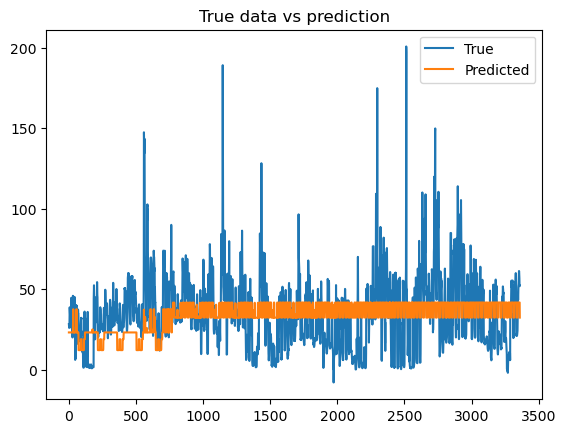

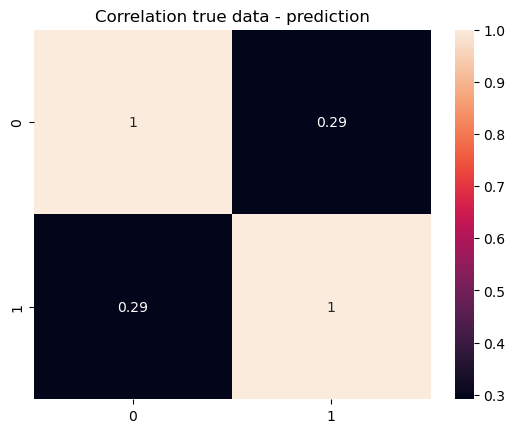

	r^2=0.075629
Mean Absolute Error (MAE): 16.32101884323502
Mean Squared Error (MSE): 444.8378570891895
Root Mean Squared Error (RMSE): 21.0911796040238
Mean Absolute Percentage Error (MAPE): 252.37
Accuracy: -152.37
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


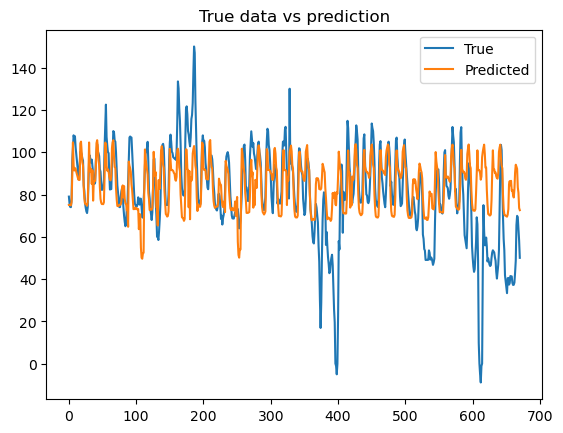

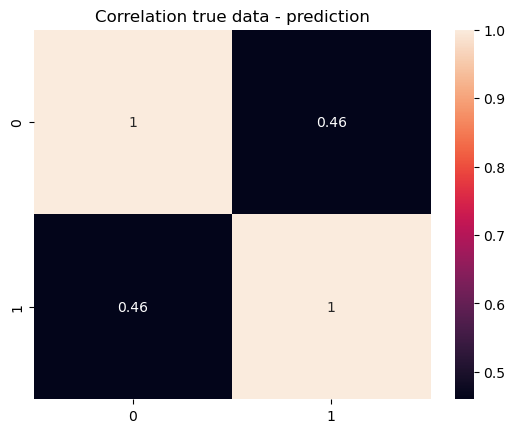

	r^2=0.179524
Mean Absolute Error (MAE): 13.663670794710821
Mean Squared Error (MSE): 403.23179094428883
Root Mean Squared Error (RMSE): 20.0806322346755
Mean Absolute Percentage Error (MAPE): 1717.01
Accuracy: -1617.01
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


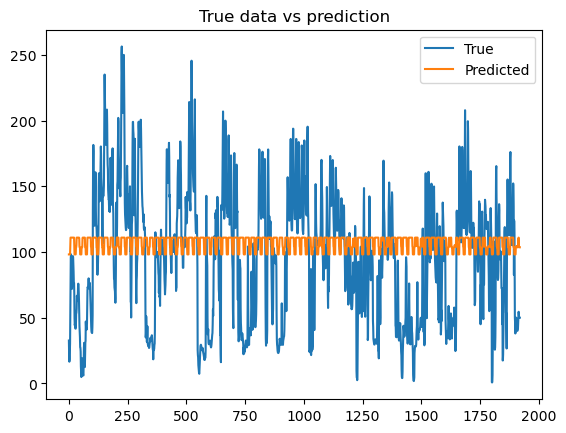

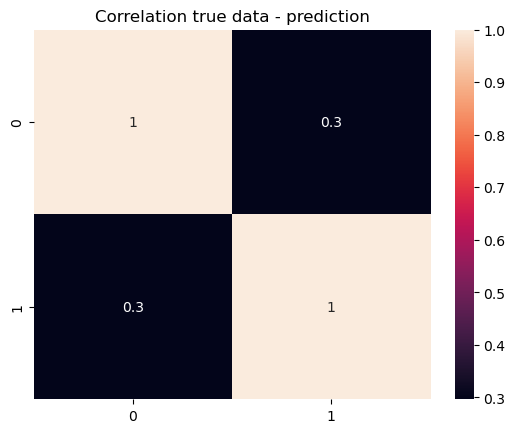

	r^2=0.006834
Mean Absolute Error (MAE): 40.68719364026369
Mean Squared Error (MSE): 2438.706391733783
Root Mean Squared Error (RMSE): 49.38326023799748
Mean Absolute Percentage Error (MAPE): 120.75
Accuracy: -20.75


In [53]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

In [22]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


ValueError: feature_names must be string, and may not contain [, ] or <

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [16]:
split_method = 1

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


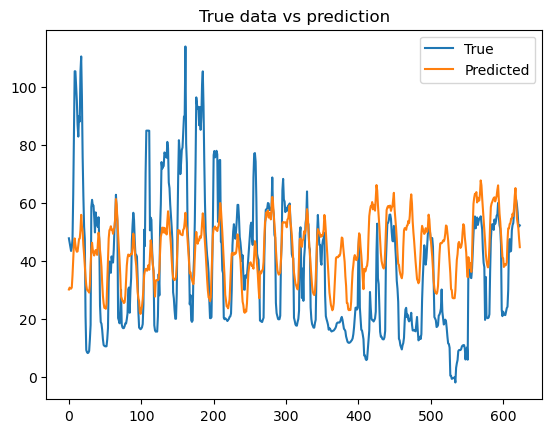

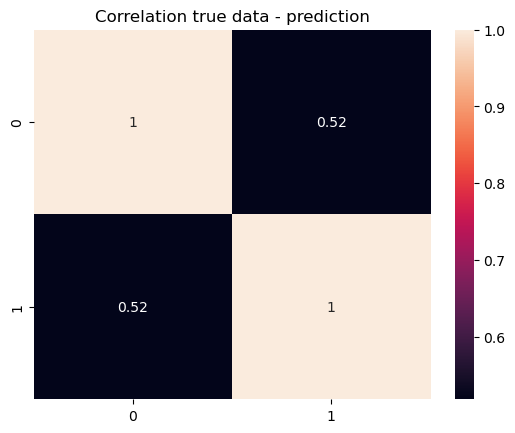

	r^2=0.205084
Mean Absolute Error (MAE): 16.52241190844902
Mean Squared Error (MSE): 422.9290097332413
Root Mean Squared Error (RMSE): 20.565237896344435
Mean Absolute Percentage Error (MAPE): 169.14
Accuracy: -69.14
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


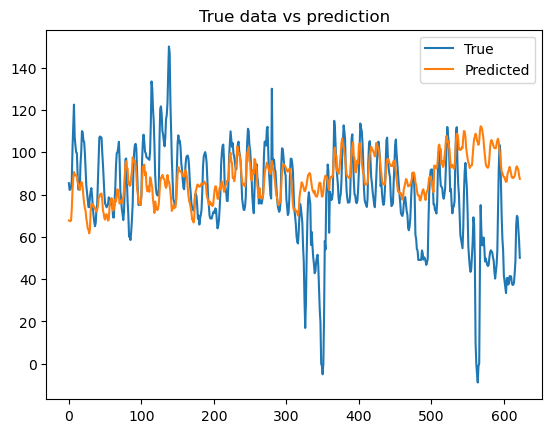

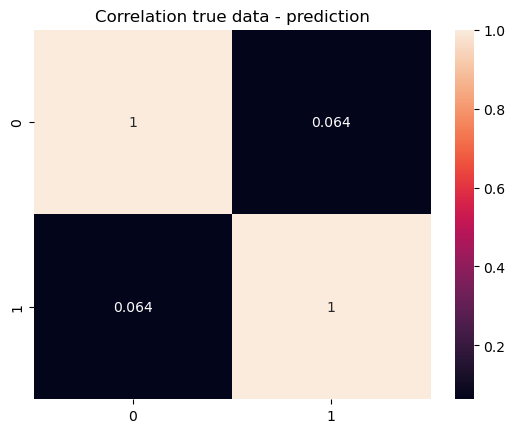

	r^2=-0.258808
Mean Absolute Error (MAE): 17.860673859093794
Mean Squared Error (MSE): 644.2733288432345
Root Mean Squared Error (RMSE): 25.38253984224657
Mean Absolute Percentage Error (MAPE): 1938.08
Accuracy: -1838.08
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


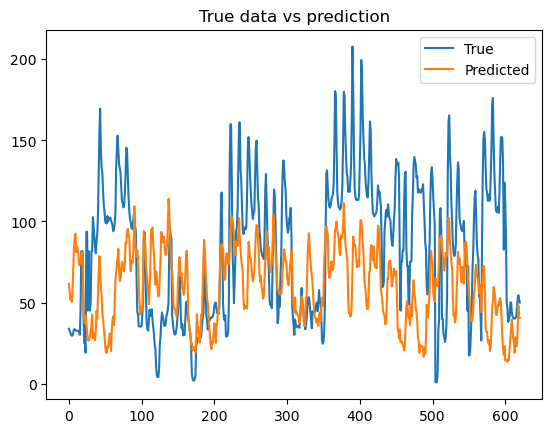

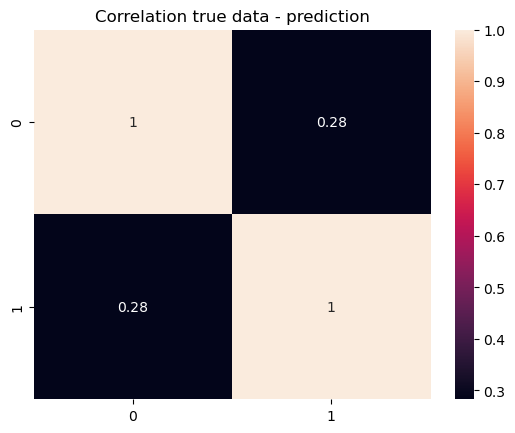

	r^2=-0.269821
Mean Absolute Error (MAE): 39.17621534275632
Mean Squared Error (MSE): 2272.941235761344
Root Mean Squared Error (RMSE): 47.675373472699135
Mean Absolute Percentage Error (MAPE): 97.16
Accuracy: 2.84


In [13]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


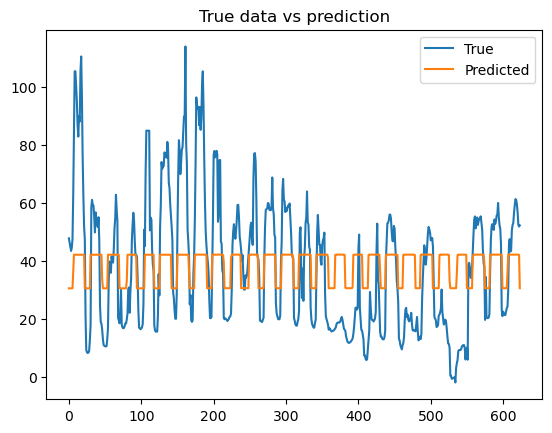

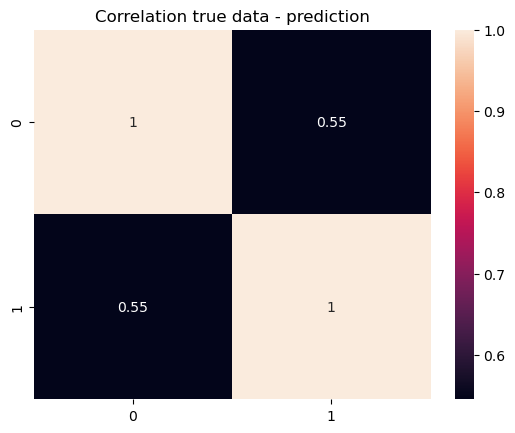

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


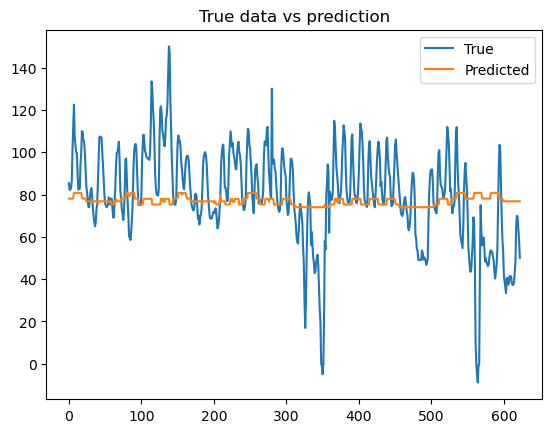

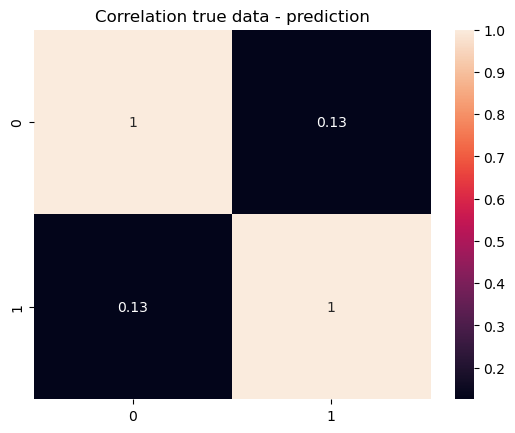

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


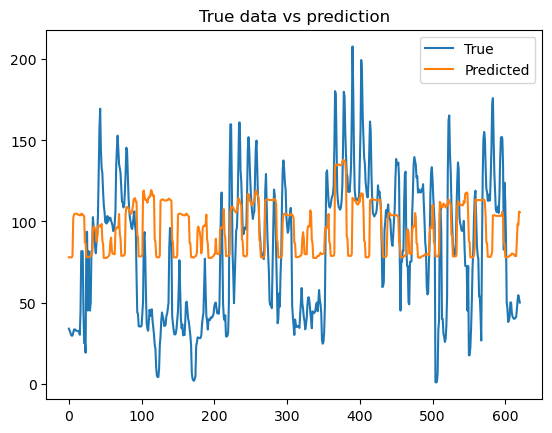

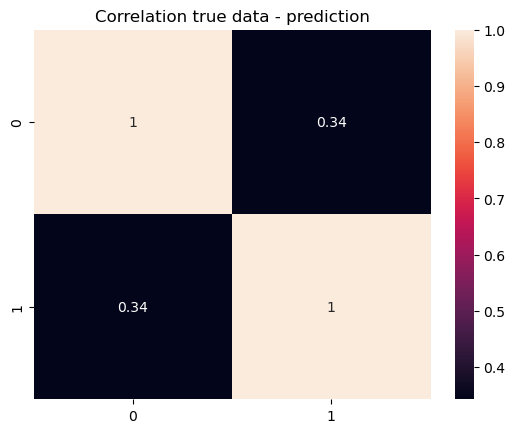

	r^2=0.027060
Mean Absolute Error (MAE): 35.154494180879226
Mean Squared Error (MSE): 1741.5338329254685
Root Mean Squared Error (RMSE): 41.73168859422619
Mean Absolute Percentage Error (MAPE): 144.0
Accuracy: -44.0


In [24]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


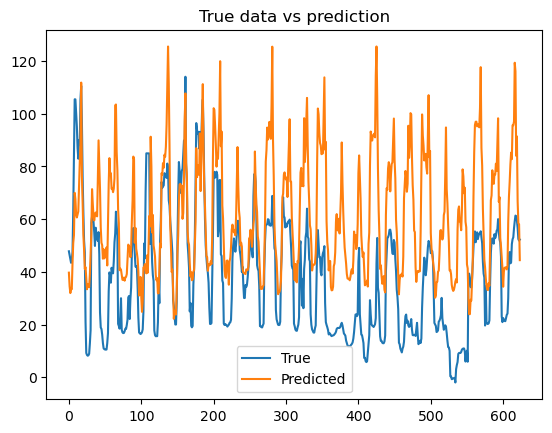

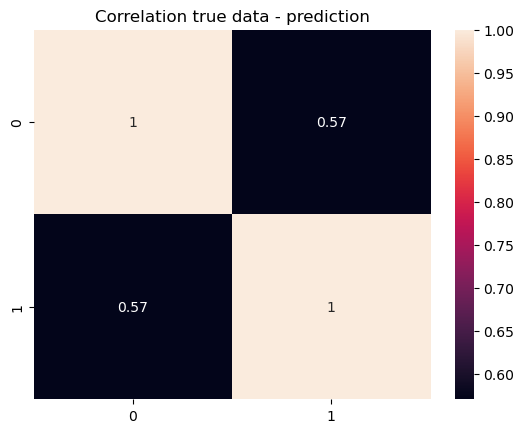

	r^2=-0.779168
Mean Absolute Error (MAE): 25.72464485474122
Mean Squared Error (MSE): 946.5924359395527
Root Mean Squared Error (RMSE): 30.76674236801083
Mean Absolute Percentage Error (MAPE): 229.99
Accuracy: -129.99
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


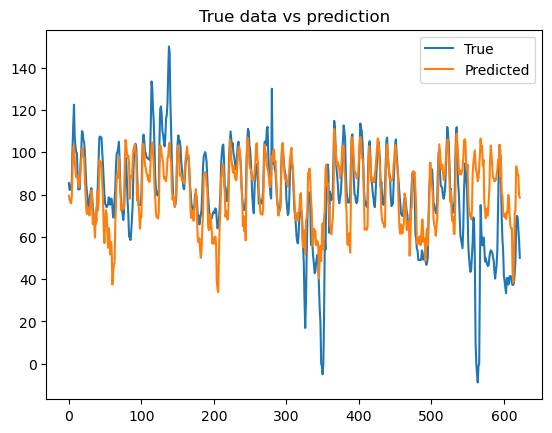

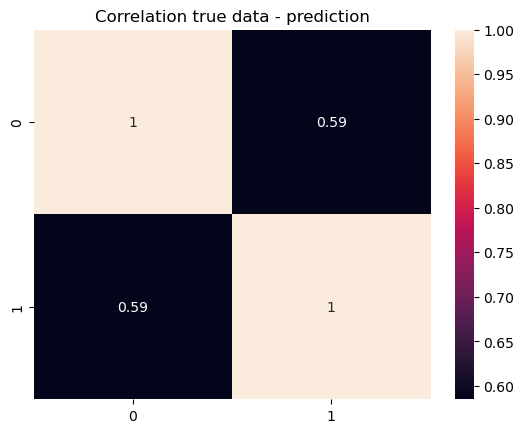

	r^2=0.323039
Mean Absolute Error (MAE): 12.927689907998564
Mean Squared Error (MSE): 346.4770121309075
Root Mean Squared Error (RMSE): 18.613892986984414
Mean Absolute Percentage Error (MAPE): 1369.58
Accuracy: -1269.58
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


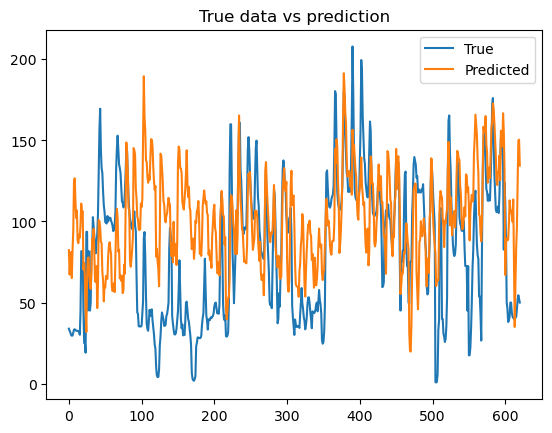

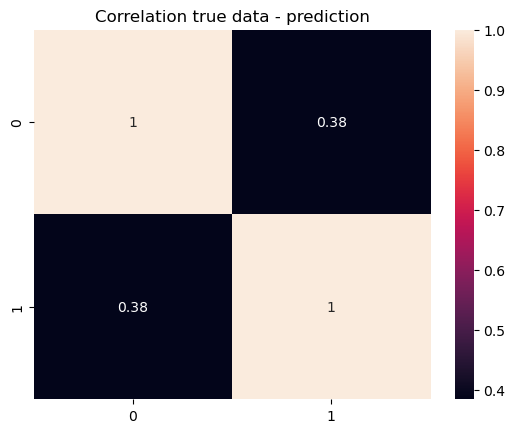

	r^2=-0.119382
Mean Absolute Error (MAE): 36.39553975607462
Mean Squared Error (MSE): 2003.6598993340392
Root Mean Squared Error (RMSE): 44.762259765722725
Mean Absolute Percentage Error (MAPE): 143.45
Accuracy: -43.45


In [29]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)

# Long term

In [5]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge


r=df.copy()
r = r.set_index('Timestamp')

def build_far(x_train, y_train, x_test,steps): # same split as short term
    model_ = ForecasterAutoreg(regressor = Ridge(),lags = 336)
    model_.fit(y=y_train,exog=x_train)
    ypred = model_.predict(steps = steps,exog = x_test)
# Add datetime index to predictions
    #ypred = pd.Series(data=ypred, index=x_test.index)
    return ypred, model_